### Linear Regression

In [1]:
# imorting basic libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# loading the dataset
df=pd.read_csv('salary_data.csv')

In [20]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [21]:
# lets rename the column for simplicity
df.columns=['exp','salary']
df.head(2)

,exp,salary
0,1.1,39343.0
1,1.3,46205.0


In [22]:
df.shape

(30, 2)

In [23]:
# Selecting dependent and independet variable
X=df.drop('salary',axis=1)
y=df.salary

In [24]:
X[0:5]

,exp
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [25]:
y[0:5]

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: salary, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [9]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [10]:
# fitting our model
model.fit(X_train,y_train)

LinearRegression()

In [11]:
# defining prediction vector
y_pred=model.predict(X_test)

In [12]:
X_pred= model.predict(X_train) 

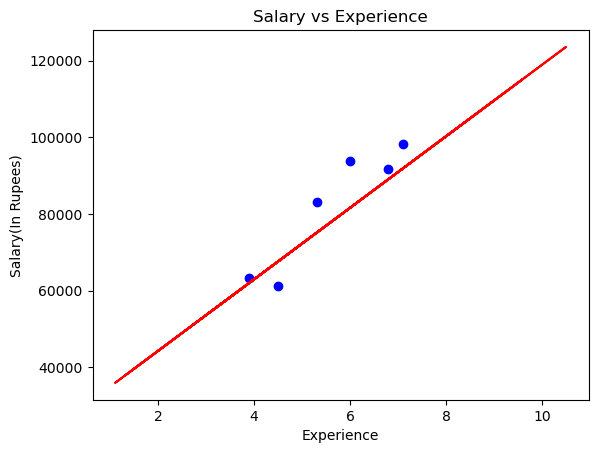

In [13]:
# visualizing the Test set results:
plt.scatter(X_test, y_test, color="blue")   
plt.plot(X_train, X_pred, color="red")    
plt.title("Salary vs Experience")  
plt.xlabel("Experience")  
plt.ylabel("Salary(In Rupees)")  
plt.show()  

From above figure we can see that most of our data points are close to our regression line..

### Save a model to string using pickle:

In [14]:
import pickle
  
# Save the trained model as a pickle string.
saved_model = pickle.dumps(model)
  
# Load the pickled model
model = pickle.loads(saved_model)

In [15]:
# Use the loaded pickled model to make predictions
model.predict(X_test[0:1])

array([75074.50510972])

### Pickled model as a file using joblib: 

Joblib is the replacement of pickle as it is more efficient on objects that carry large numpy arrays. These functions also accept file-like object instead of filenames.

        joblib.dump to serialize an object hierarchy 
        joblib.load to deserialize a data stream
        from joblib import parallel, delayed

In [16]:
import joblib
from joblib import parallel,delayed

In [17]:
# Save the model as a pickle in a file
joblib.dump(model, 'model1.pkl')
  
# Load the model from the file
model1 = joblib.load('model1.pkl')
  
# Use the loaded model to make predictions
model1.predict(X_test)

array([75074.50510972, 91873.8056381 , 62008.38247653, 81607.56642631,
       67608.14931932, 89073.92221671])

### Local deployment using Streamlit

In [18]:
import pickle
import joblib
import streamlit as st
from PIL import Image

# Load the model from the file
model1 = joblib.load('model1.pkl')

st.title('Iris Flower Prediction')
html_temp = """
    <div style ="background-color:yellow;padding:13px">
    <h1 style ="color:black;text-align:center;">Streamlit Iris Flower Classifier ML App </h1>
    </div>
    """
st.markdown(html_temp, unsafe_allow_html = True)

sepal_length = st.text_input("Sepal Length", "Type Here")
sepal_width = st.text_input("Sepal Width", "Type Here")
petal_length = st.text_input("Petal Length", "Type Here")
petal_width = st.text_input("Petal Width", "Type Here")
result=""
if st.button("Predict"):
    result = model1.predict([[sepal_length, sepal_width, petal_length, petal_width]])
st.success('The output is {}'.format(result))

2024-01-01 21:46:33.631 
  command:

    streamlit run C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)